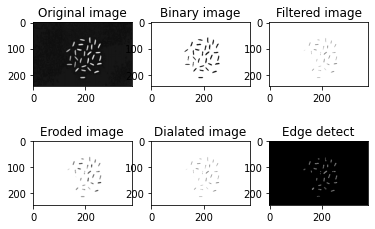

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


def detect_grains(imgPath):
    img = cv2.imread(imgPath, 0)
    ret, binary = cv2.threshold(img, 150, 255, 1)
    kernel = np.ones((5, 5), np.float32) / 9
    dst = cv2.filter2D(binary, -1, kernel)
    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    erosion = cv2.erode(dst, kernel2, iterations=1)
    dilation = cv2.dilate(erosion, kernel2, iterations=1)
    edges = cv2.Canny(dilation, 100, 100)

    return img, binary, dst, erosion, dilation, edges


def plot_img(img, binary, dst, erosion, dilation, edges, imgs_row, imgs_col):
    plt.subplot(imgs_row, imgs_col, 1), plt.imshow(img, 'gray')
    plt.title("Original image")

    plt.subplot(imgs_row, imgs_col, 2), plt.imshow(binary, 'gray')
    plt.title("Binary image")

    plt.subplot(imgs_row, imgs_col, 3), plt.imshow(dst, 'gray')
    plt.title("Filtered image")

    plt.subplot(imgs_row, imgs_col, 4), plt.imshow(erosion, 'gray')
    plt.title("Eroded image")

    plt.subplot(imgs_row, imgs_col, 5), plt.imshow(dilation, 'gray')
    plt.title("Dialated image")

    plt.subplot(imgs_row, imgs_col, 6), plt.imshow(edges, 'gray')
    plt.title("Edge detect")

    plt.show()


if __name__ == '__main__':
    imgPath = '/home/knoldus/PycharmProjects/rice-quality-analysis-master/Image_dataset/rice.png'
    imgs_row = 2
    imgs_col = 3

    img, binary, dst, erosion, dilation, edges = detect_grains(imgPath)

    plot_img(img, binary, dst, erosion, dilation, edges, imgs_row, imgs_col)
